# Simple Data Analysis using LearnDB Queries

__Author__: Brendan Whelan

This notebook demonstates how data queried from a LearnDB instance can be used to analyse and plot results. 

__Note:__ To run this notebook, the relevant python libraries should be available in the exeuction environment. Such an environemnt can be setup, as an example using miniconda, using `conda create -n learndb_data_analysis_env python=3 matplotlib numpy jupyter` followed by installing the Python package from it by running `pip install -e .` from the folder `imaging_db_clients\client_libs\python_clients`. 

First, import the client module and authenticate with a database instance. Please nots that the database server used here is a test instance created specifically for the users to explore and unserstand how to use the database client library.

In [1]:
from ImagingDBClient import Clients
from pathlib import Path

databaseServiceURL = "http://10.65.67.77:8091"

dbClient = Clients.ImagingDBClient(baseUrl=databaseServiceURL)

Using temporary cache path: C:\Users\igho9814\AppData\Local\Temp\tmph12gyd63


In [2]:
tokenFilePath = Path("testdata/token.txt")

with open(tokenFilePath, 'r') as tokenFile:
    tokenStr = tokenFile.readline()

dbClient.makeAuthRequest(tokenStr)

True

Once authenticated, we would issue a query to get the patients data.

In [3]:
patients = dbClient.getPatients()

With the queried data, a plotting framework such as `matplotlib` can be used to graphically represent the data.

In [4]:
# example of extracting the number of markers for each patient for each included trial and plotting:
from matplotlib import pyplot as plt
import numpy as np
from itertools import compress

Now, using the patient data queried earlier, extract the name of trails available.

In [5]:
all_trial_names = [patient['trial'] for patient in patients['patients']]
unique_trial_names = np.unique(all_trial_names)

Next, for each trial, plot the number of markers used on the patients.

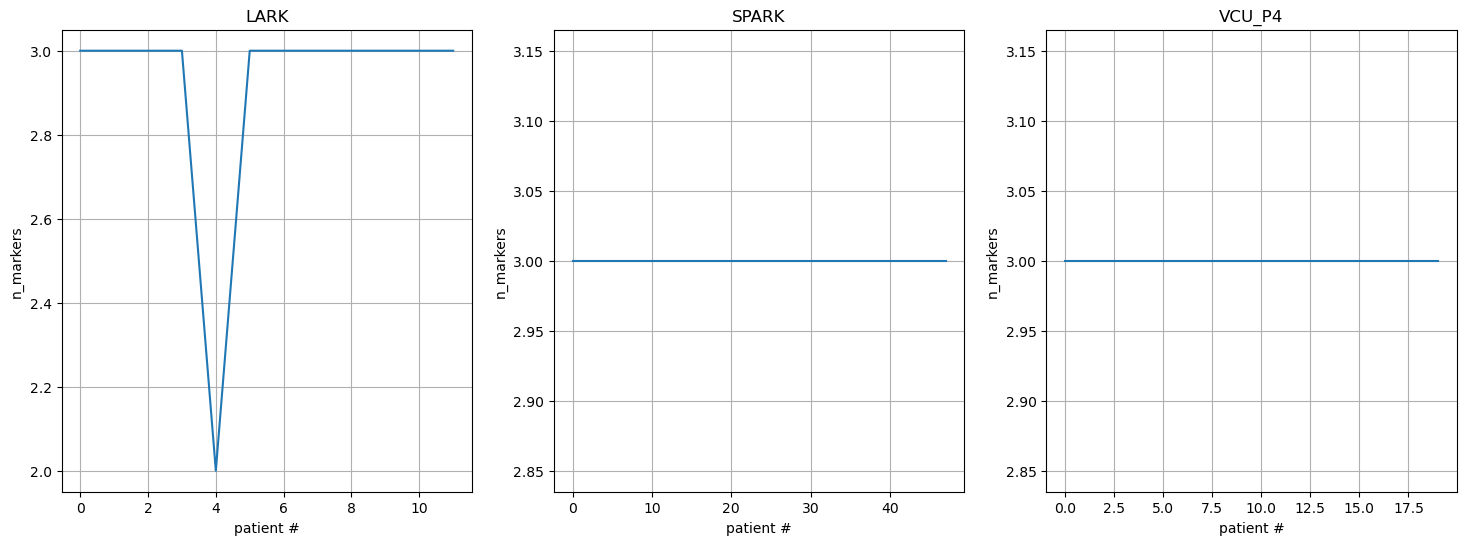

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=len(unique_trial_names), figsize=[6*len(unique_trial_names),6])

for i, trial in enumerate(unique_trial_names):
    trial_index = [trial in trial_name for trial_name in all_trial_names]
    trial_patients = list(compress(patients['patients'], trial_index))
    num_markers = []
    for patient in trial_patients:
        num_markers.append(patient['num_markers'])
    axs[i].plot(num_markers)
    axs[i].grid()
    axs[i].set_xlabel('patient #')
    axs[i].set_ylabel('n_markers')
    axs[i].set_title(trial)